Loading the necessarry packages

In [6]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

sns.set_style('darkgrid')

2024-10-18 18:25:26.018940: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 18:25:26.356469: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 18:25:26.713934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 18:25:26.936692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 18:25:26.995064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 18:25:27.591749: I tensorflow/core/platform/cpu_feature_gu

## Loading the dataset
The dataset used is the house prices dataset. It contains 79 features (after removing the Id column) and 1 target variable (SalePrice).


In [2]:
dataset_df = pd.read_csv("train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [3]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploring the data
Visualize and understand the dataset.

In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_693/3430012634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


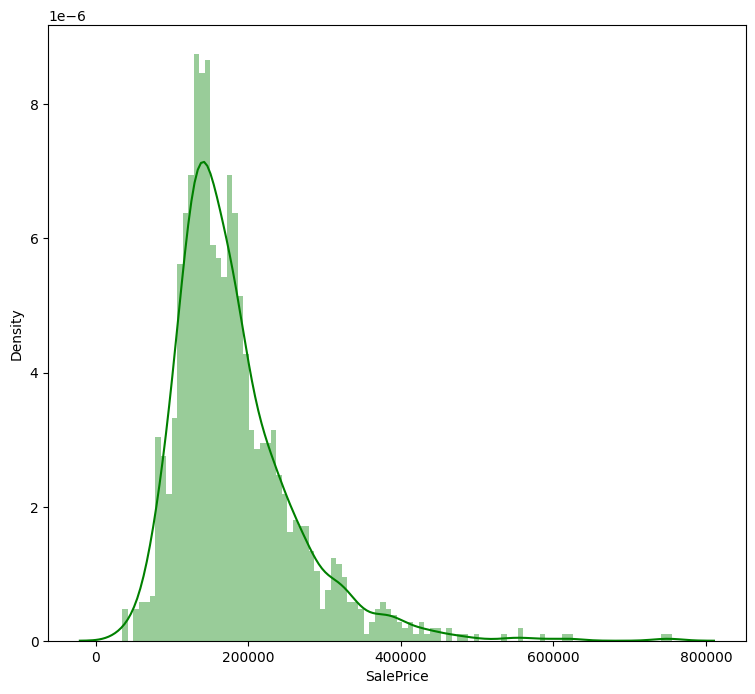

In [5]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Numerical data distribution

In [6]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [7]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


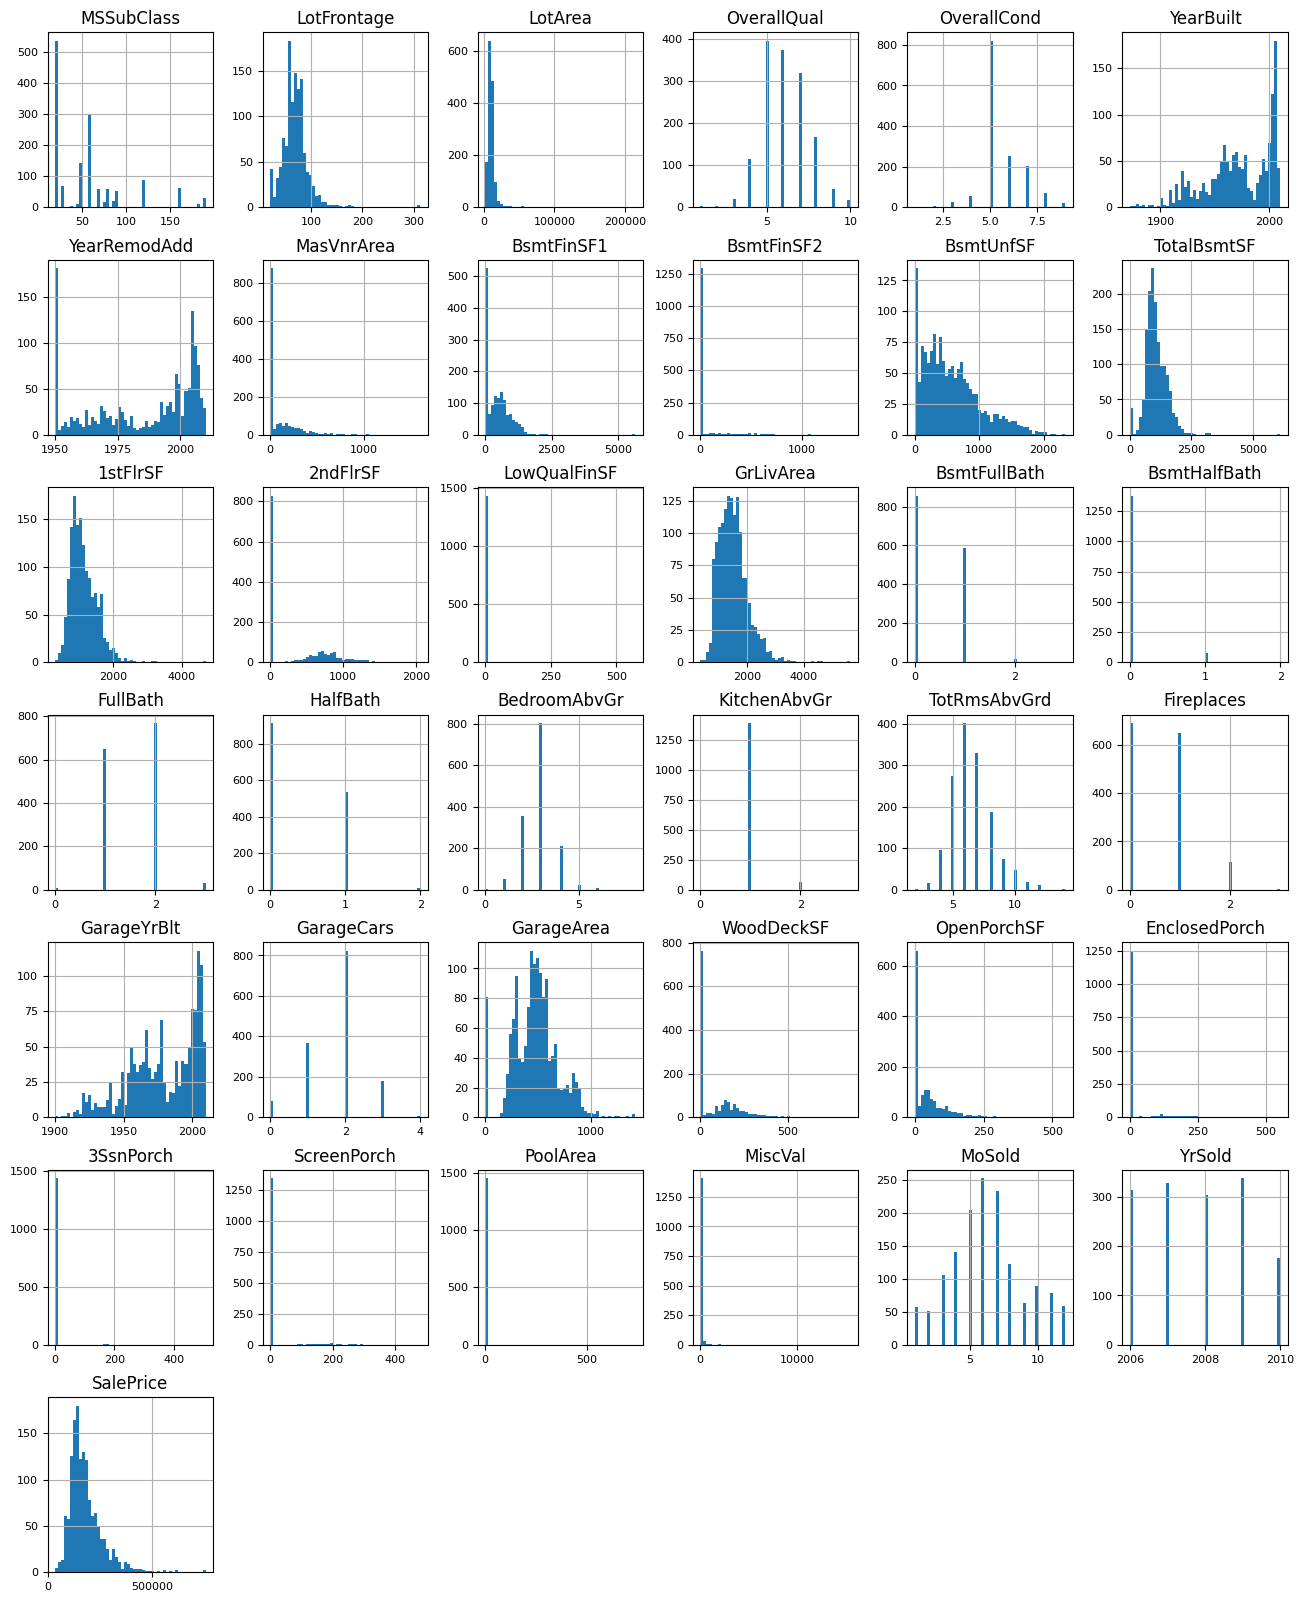

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [9]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1030 examples in training, 430 examples in testing.


In [10]:
tfdf.keras.get_all_models()


[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

#### We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).

In [11]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

## Create a Random Forest
we will use the defaults to create the Random Forest Model while specifiyng the task type as tfdf.keras.Task.REGRESSION.

In [12]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpnjihiu3c as temporary training directory


## Training the model

In [13]:
rf.fit(x=train_ds)

Reading training dataset...


Training dataset read in 0:00:10.764500. Found 1030 examples.
Training model...


I0000 00:00:1729082978.195798     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729082978.198472     693 kernel.cc:775] Collect training examples
I0000 00:00:1729082978.198531     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729082978.202553     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729082978.202699     693 kernel.cc:395] Number of examples: 1030
I0000 00:00:1729082978.207446     693 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729082978.208199     693 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:03.881042
Compiling model...


I0000 00:00:1729082982.002636     693 decision_forest.cc:761] Model loaded with 300 root(s), 97962 node(s), and 74 input feature(s).
I0000 00:00:1729082982.006115     693 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-10-16 15:49:42.006262: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


## Evaluate the model on the Out of bag (OOB) data and the validation dataset¶

We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.



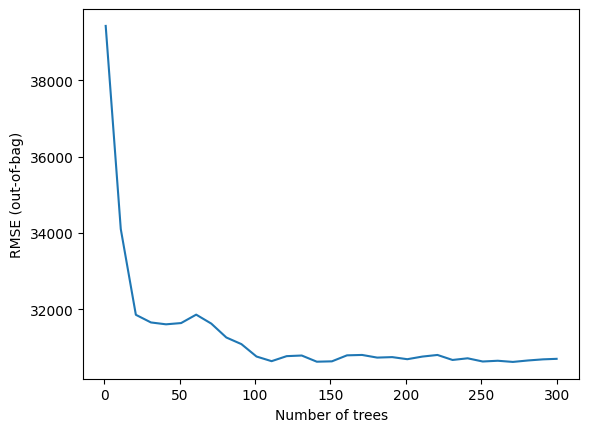

In [14]:

import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [15]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1030, accuracy=None, loss=None, rmse=30702.848909334458, ndcg=None, aucs=None, auuc=None, qini=None)

In [16]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - mse: 847304192.0000
loss: 0.0000
mse: 847304192.0000


### Feature Importance

In [17]:
inspector = rf.make_inspector()
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

# Example: Importance by number of times used as root node
print(inspector.variable_importances()["NUM_AS_ROOT"])


Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES
[("OverallQual" (1; #62), 105.0), ("ExterQual" (4; #22), 56.0), ("Neighborhood" (4; #59), 45.0), ("GarageCars" (1; #32), 38.0), ("GrLivArea" (1; #38), 19.0), ("KitchenQual" (4; #44), 12.0), ("YearBuilt" (1; #76), 7.0), ("TotalBsmtSF" (1; #73), 6.0), ("GarageArea" (1; #31), 4.0), ("BsmtQual" (4; #14), 3.0), ("BsmtFinSF1" (1; #8), 2.0), ("GarageYrBlt" (1; #37), 2.0), ("FullBath" (1; #29), 1.0)]


## Fitting a gradient boosted tree


In [18]:
import tensorflow_decision_forests as tfdf

# Initialize Gradient Boosted Trees model
gbt = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)


Use /tmp/tmpvpwo6dwj as temporary training directory


2024-10-16 15:52:57.011666: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1816] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2024-10-16 15:52:57.011830: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1826] "goss_beta" set but "sampling_method" not equal to "GOSS".
2024-10-16 15:52:57.011869: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1840] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [19]:
gbt.fit(train_ds)


Reading training dataset...


Training dataset read in 0:00:02.348628. Found 1030 examples.
Training model...


I0000 00:00:1729083291.378233     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729083291.378368     693 kernel.cc:775] Collect training examples
I0000 00:00:1729083291.378406     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729083291.379240     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729083291.379306     693 kernel.cc:395] Number of examples: 1030
I0000 00:00:1729083291.383804     693 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729083291.384027     693 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:05.993672
Compiling model...


I0000 00:00:1729083297.163843  216227 early_stopping.cc:53] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 24380.5
2024-10-16 15:54:57.165313: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1616] Create final snapshot of the model at iteration 98
2024-10-16 15:54:57.175907: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:275] Truncates the model to 69 tree(s) i.e. 69  iteration(s).
2024-10-16 15:54:57.176224: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:337] Final model num-trees:69 valid-loss:24380.539062 valid-rmse:24380.539062
I0000 00:00:1729083297.182940  216227 kernel.cc:920] Export model in log directory: /tmp/tmpvpwo6dwj with prefix 94ccc7aac3e14d1d
I0000 00:00:1729083297.189067  216227 kernel.cc:938] Save model in resources
I0000 00:00:1729083297.191191     693 abstract_m

Model compiled.


In [20]:
gbt.evaluate(valid_ds)

1/1 [==============================] - 1s 864ms/step - loss: 0.0000e+00


0.0

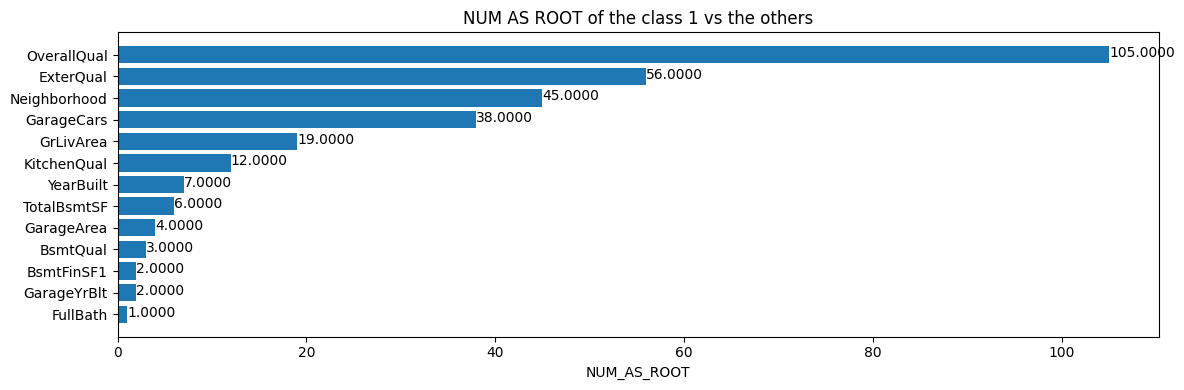

In [21]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [22]:
test_data = pd.read_csv("test.csv")
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 2s 83ms/step


,Id,SalePrice
0,1461,125769.851562
1,1462,155127.140625
2,1463,174755.312500
3,1464,183228.953125
4,1465,198582.796875


In [29]:
output.to_csv("submission_two.csv", index=False)

## Model improvement

In [24]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
kf = KFold(n_splits=5)

# Initialize arrays to hold the RMSE values for each fold
rmse_per_fold = []

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(dataset_df):
    train_ds_cv = dataset_df.iloc[train_index]
    valid_ds_cv = dataset_df.iloc[test_index]

    train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_cv, label=label, task=tfdf.keras.Task.REGRESSION)
    valid_tf = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_cv, label=label, task=tfdf.keras.Task.REGRESSION)

    # Initialize and train the model
    rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
    rf.compile(metrics=["mse"])  # Ensure MSE is a metric
    rf.fit(x=train_tf)

    # Evaluate the model
    evaluation = rf.evaluate(x=valid_tf, return_dict=True)
    
    # Calculate RMSE from MSE
    mse = evaluation['mse']
    rmse = np.sqrt(mse)
    rmse_per_fold.append(rmse)

# Output the average RMSE across folds
print(f"Average RMSE across folds: {np.mean(rmse_per_fold)}")


Use /tmp/tmp22z3jsxf as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.265365. Found 1168 examples.
Training model...


I0000 00:00:1729084318.941360     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729084318.941469     693 kernel.cc:775] Collect training examples
I0000 00:00:1729084318.941496     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729084318.942039     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729084318.942076     693 kernel.cc:395] Number of examples: 1168
I0000 00:00:1729084318.946740     693 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729084318.946877     693 data_spec_inference.cc:306] 2 item(s) have been prun

Model trained in 0:00:04.244715
Compiling model...


I0000 00:00:1729084323.137332     693 decision_forest.cc:761] Model loaded with 300 root(s), 110812 node(s), and 74 input feature(s).
I0000 00:00:1729084323.137456     693 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-10-16 16:12:03.137507: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 934ms/step - loss: 0.0000e+00 - mse: 590115136.0000
Use /tmp/tmpv6mo2dc3 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:02.017609. Found 1168 examples.
Training model...


I0000 00:00:1729084328.270671     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729084328.270760     693 kernel.cc:775] Collect training examples
I0000 00:00:1729084328.270785     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729084328.271301     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729084328.271397     693 kernel.cc:395] Number of examples: 1168
I0000 00:00:1729084328.282295     693 data_spec_inference.cc:306] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729084328.283098     693 data_spec_inference.cc:306] 5 item(s) have been pr

Model trained in 0:00:03.980010
Compiling model...


I0000 00:00:1729084332.211705     693 decision_forest.cc:761] Model loaded with 300 root(s), 110958 node(s), and 77 input feature(s).
2024-10-16 16:12:12.211859: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


1/1 [==============================] - 1s 936ms/step - loss: 0.0000e+00 - mse: 952366208.0000
Use /tmp/tmpcsiuox1a as temporary training directory
Reading training dataset...


Training dataset read in 0:00:01.893460. Found 1168 examples.
Training model...


I0000 00:00:1729084337.316945     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729084337.317055     693 kernel.cc:775] Collect training examples
I0000 00:00:1729084337.317099     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729084337.317733     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729084337.317807     693 kernel.cc:395] Number of examples: 1168
I0000 00:00:1729084337.322523     693 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729084337.322720     693 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:03.946850
Compiling model...


I0000 00:00:1729084341.216645     693 decision_forest.cc:761] Model loaded with 300 root(s), 111052 node(s), and 73 input feature(s).
I0000 00:00:1729084341.216860     693 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-10-16 16:12:21.216904: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 1007904960.0000
Use /tmp/tmpja0i51ga as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.001601. Found 1168 examples.
Training model...


I0000 00:00:1729084346.865958     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729084346.866065     693 kernel.cc:775] Collect training examples
I0000 00:00:1729084346.866093     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729084346.866725     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729084346.866774     693 kernel.cc:395] Number of examples: 1168
I0000 00:00:1729084346.874162     693 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729084346.875014     693 data_spec_inference.cc:306] 2 item(s) have been prun

Model trained in 0:00:04.139765
Compiling model...


I0000 00:00:1729084350.965262     693 decision_forest.cc:761] Model loaded with 300 root(s), 110916 node(s), and 76 input feature(s).
2024-10-16 16:12:30.965425: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 482650368.0000
Use /tmp/tmp0dvgx4o3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.043288. Found 1168 examples.
Training model...


I0000 00:00:1729084357.417952     693 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1729084357.418046     693 kernel.cc:775] Collect training examples
I0000 00:00:1729084357.418071     693 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1729084357.418986     693 kernel.cc:394] Number of batches: 2
I0000 00:00:1729084357.419029     693 kernel.cc:395] Number of examples: 1168
I0000 00:00:1729084357.422760     693 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1729084357.422873     693 data_spec_inference.cc:306] 2 item(s) have been prun

Model trained in 0:00:04.101539
Compiling model...


I0000 00:00:1729084361.478877     693 decision_forest.cc:761] Model loaded with 300 root(s), 110740 node(s), and 74 input feature(s).
I0000 00:00:1729084361.478985     693 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-10-16 16:12:41.479028: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.
1/1 [==============================] - 1s 801ms/step - loss: 0.0000e+00 - mse: 1068946368.0000
Average RMSE across folds: 28312.85719721548
